## Question 1:

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 


### 1(a).
Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 


We will import the dataset and necessary libraries to analyze the dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#import the dataset
dataset = pd.read_excel('2019 Winter Data Science Intern Challenge Data Set.xlsx')

In [3]:
dataset.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56.190
1,2,92,925,90,1,cash,2017-03-03 17:38:51.999
2,3,44,861,144,1,cash,2017-03-14 04:23:55.595
3,4,18,935,156,1,credit_card,2017-03-26 12:43:36.649
4,5,18,883,156,1,credit_card,2017-03-01 04:35:10.773


In [4]:
dataset.shape

(5000, 7)

In [5]:
#check for null values
dataset.isnull().sum()

order_id          0
shop_id           0
user_id           0
order_amount      0
total_items       0
payment_method    0
created_at        0
dtype: int64

In [6]:
dataset['order_amount'].sum()

15725640

In [7]:
dataset['order_amount'].mean()

3145.128

In [11]:
#statistical info of the dataset
dataset['order_amount'].describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

Trying to understand the statistical values on the 'order_amount' column. The Average Order Value(mean) is $3145.128$, the standard deviation is $41282.539$ which is a large amount considering that the Sneakers is a relatively affordable amount. Also looking at the minimum order amount to the 75% percentile, they are within the affordable range, however, the maximum order amount is an outrageous amount for a pair of sneakers so that explains the huge AOC(mean) and the high standard deviation.

This could be an outlier or it could be correct so let's explore further and understand why it is so.
We will use a boxplot and histplot to understand the distribution.

In [12]:
sns.set()

C:\Users\oluwa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


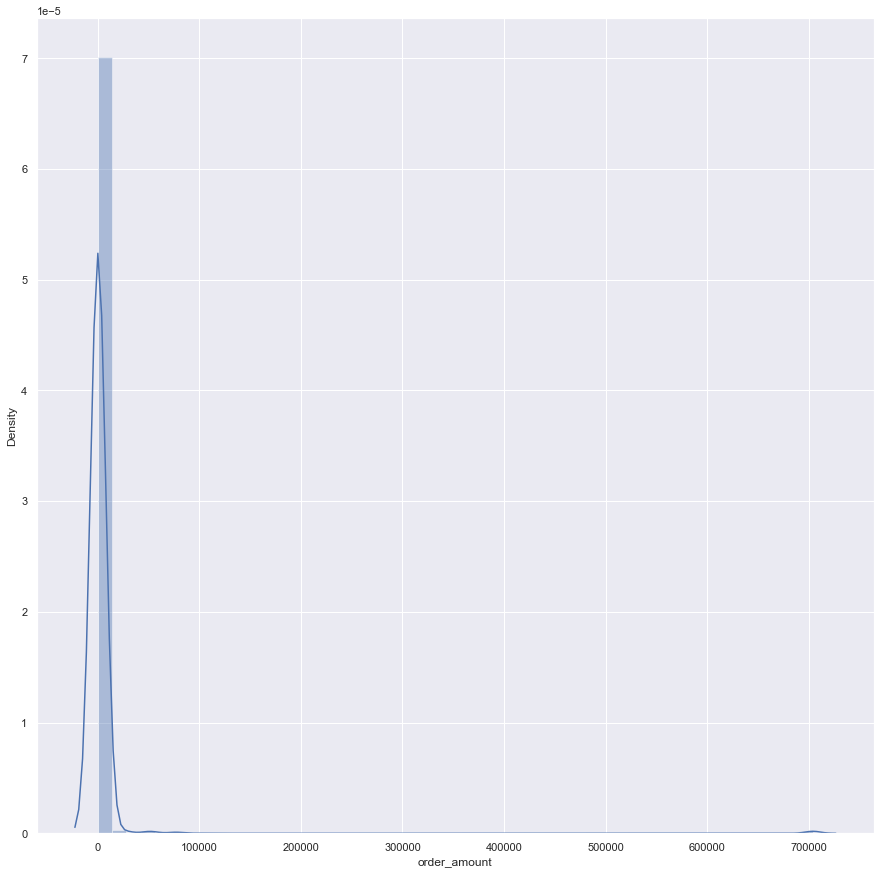

In [22]:
plt.figure(figsize=(15,15))
sns.distplot(dataset['order_amount'])
plt.show()

<AxesSubplot:>

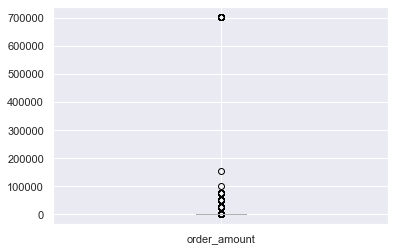

In [23]:
dataset.boxplot(column='order_amount')

The distplot shows that even though the data is skewed towards the left side(smaller values), there are some values in the right side and the boxplot confirms the presence of outliers as the entire box portion of the boxplot is just a line along the zero mark which is close to the reasonable amount that the sneakers could go for. We will further confirm the number of outliers by grouping the data by order_amount and sort in descending order to get the largest amount to the smallers amount and the number of times the amount appeared(count)

In [24]:
agg_amounts = dataset.groupby(['order_amount']).size().reset_index(name='count').sort_values(by='order_amount', ascending=False)

agg_amounts.head(10)

,order_amount,count
257,704000,17
256,154350,1
255,102900,1
254,77175,9
253,51450,16
252,25725,19
251,1760,1
250,1408,2
249,1086,1
248,1064,1


So it looks like some of the high order amounts are repeated and most notably the $704000$, $77175$, $51450$, $25725$. So we will look at these rows from the main dataset to understand why it might have occured like this.

In [30]:
sort_dataset = dataset.loc[dataset.order_amount.isin([704000, 77175, 51450, 25725])].sort_values(by=['order_amount', 'created_at'], ascending=False)
sort_dataset.head(50)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
2835,2836,42,607,704000,2000,credit_card,2017-03-28 04:00:00.000
2969,2970,42,607,704000,2000,credit_card,2017-03-28 04:00:00.000
4056,4057,42,607,704000,2000,credit_card,2017-03-28 04:00:00.000
4882,4883,42,607,704000,2000,credit_card,2017-03-25 04:00:00.000
1104,1105,42,607,704000,2000,credit_card,2017-03-24 04:00:00.000
3332,3333,42,607,704000,2000,credit_card,2017-03-24 04:00:00.000
4868,4869,42,607,704000,2000,credit_card,2017-03-22 04:00:00.000
1562,1563,42,607,704000,2000,credit_card,2017-03-19 04:00:00.000
1602,1603,42,607,704000,2000,credit_card,2017-03-17 04:00:00.000
1362,1363,42,607,704000,2000,credit_card,2017-03-15 04:00:00.000


There are a lot of interesting insights from this sorted table.
1. For the 704000 order_amounts, it occured at the same shop(42) and the same buyer(607) and it seems like a supplier buying in a large quantity hence the quantity(total_item) is consistently 2000 so this is not an issue because it could not have raised the AOV. However, I noticed that some orders were duplicated as it came at the same time(2017-03-28 04:00:00.000) by the same user and same shop which is impossible. This could be a system error as it will give us the wrong value for the total quantity of sneakers sold for that month.



2. Also, the order amounts for 77175, 51450, 25725 are similar. It seems like the orders of 51450 and 77175 are just transactions of buyers that bought two and three items respectively worth 25725 as they all come from the same shop(78). However, I would think that this is an outlier because 25725 is a large amount considering that it is a one model sneakers that should be affordable. This might be why we have a high AOV.

A better way to evaluate this date is to clean some of the values using the interquantile range(IQR) to detect(and ignore) the outliers of the dataset and finding the lower bound(q1 - 1.5 * IQR) and the upper bound(q3 + 1.5 * IQR).

N/B: Any data point less than the lower bound or more than the upper bound is considered as outlier

In [31]:
q1 = dataset['order_amount'].quantile(q=0.25)
q2 = dataset['order_amount'].quantile(q=0.5)
q3 = dataset['order_amount'].quantile(q=0.75)
IQR = q3 - q1

In [32]:
IQR

227.0

<AxesSubplot:>

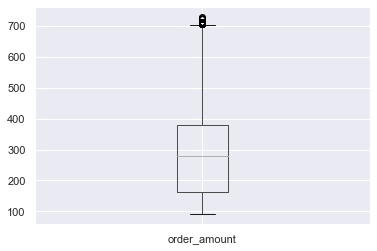

In [33]:
dataset_truncated = dataset[(dataset['order_amount'] < q3 + 1.5 * IQR) & (dataset['order_amount'] > q3 - 1.5 * IQR)]
dataset_truncated.boxplot(column='order_amount')

Hence, we are going to use the truncated data(dataset_truncated) as the new decision range and a more accurate representation of our dataset.


In [35]:
dataset_truncated['order_amount'].describe()

count    4859.000000
mean      293.715374
std       144.453395
min        90.000000
25%       162.000000
50%       280.000000
75%       380.000000
max       730.000000
Name: order_amount, dtype: float64

### 1(b). 
What metric would you report for this dataset?


##### Answer
The boxplot of the dataset_truncated, shows that distribution of the order amount is skewed towards the lower values, and also seeing that the mean is susceptible to large outliers which can drastically affect the value, I would report the median value of the truncated dataset.

### 1(c).
What is its value?

In [36]:
dataset_truncated['order_amount'].median()

280.0

We can find that the better suited value of the AOV is $280

## Question 2

###### (2a). How many orders were shipped by Speedy Express in total?

### Answer
SELECT COUNT(*) as Number_of_Orders

FROM Orders

JOIN Shippers

ON Shippers.ShipperID = Orders.ShipperID
    
WHERE Shippers.ShipperName = 'Speedy Express'

##### Answer = 54

###### (2b). What is the last name of the employee with the most orders?


### Answer

SELECT Employees.LastName, COUNT(*) as Number_of_Orders

FROM Orders

JOIN Employees

ON Orders.EmployeeID = Employees.EmployeeID

GROUP BY Employees.LastName

ORDER BY Number_of_Orders DESC

LIMIT 1

The last name of the employee with the most orders(40) is $Peacock$

##### (2c). What product was ordered the most by customers in Germany?

### Answer

SELECT Products.ProductName, SUM(OrderDetails.Quantity) as "Total_Ordered", Customers.Country

FROM Orders

JOIN Customers ON Customers.CustomerID = Orders.CustomerID

JOIN OrderDetails ON OrderDetails.OrderID = Orders.OrderID

JOIN Products ON Products.ProductID = OrderDetails.ProductID

WHERE Customers.Country = "Germany"

GROUP BY OrderDetails.ProductID

ORDER BY Total_Ordered DESC

LIMIT 1

From the above, we can see that $Boston Crab Meat$ is the most ordered product by customers from $Germany$ at $160$ total orders.